In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.metrics import mean_squared_error
from math import sqrt
# ---------------------------
# 1. Load and Clean Dataset
df=pd.read_csv("Downloads/TS DV Lab Datasets/AirQuality.csv",sep=';',decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,",,,,,"
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,","
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [50]:
ozone=pd.read_csv("Downloads/TS DV Lab Datasets/Ozone Level_Detection_eighthr.csv",decimal=',')
ozone.head()

,Date,WSR0,WSR1,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795.0,-12.1,17.9,10330.0,-55.0,0.0,0.0
1,1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805.0,14.05,29.0,10275.0,-55.0,0.0,0.0
2,1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790.0,17.9,41.3,10235.0,-40.0,0.0,0.0
3,1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775.0,31.15,51.7,10195.0,-40.0,2.08,0.0
4,1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0


In [51]:
df['Date']=pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date',inplace=True)
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,",,,,,"
Date,,,,,,,,,,,,,,,,
2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,","
2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [52]:
ozone['Date']=pd.to_datetime(ozone['Date'], dayfirst=True)
ozone.set_index('Date',inplace=True)
ozone.head()

,WSR0,WSR1,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.1,17.9,10330.0,-55.0,0.0,0.0
1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.0,10275.0,-55.0,0.0,0.0
1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790.0,17.9,41.3,10235.0,-40.0,0.0,0.0
1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.7,10195.0,-40.0,2.08,0.0
1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0


In [53]:
df=df.apply(pd.to_numeric,errors='coerce')
df.isnull().sum()
df.dropna(how='all',axis=1,inplace=True)
df.fillna(method='ffill',inplace=True)
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [54]:
ozone=ozone.apply(pd.to_numeric,errors='coerce')
ozone.isnull().sum()
ozone.dropna(how='all',axis=1,inplace=True)
ozone.fillna(method='ffill',inplace=True)
ozone.isnull().sum()

WSR0    0
WSR1    0
3       0
4       0
5       0
       ..
69      0
70      0
71      0
72      0
73      0
Length: 73, dtype: int64

In [55]:
ozone

,WSR0,WSR1,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00,0.0
1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00,0.0
1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00,0.0
1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08,0.0
1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-12-04,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00,0.0
2004-12-05,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00,0.0
2004-12-06,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00,0.0


In [56]:
data = df[['CO(GT)','NMHC(GT)','NOx(GT)','NO2(GT)']]

data_2004 = data[data.index.year == 2004]
data_2004

,CO(GT),NMHC(GT),NOx(GT),NO2(GT)
Date,,,,
2004-03-10,2.6,150.0,166.0,113.0
2004-03-10,2.0,112.0,103.0,92.0
2004-03-10,2.2,88.0,131.0,114.0
2004-03-10,2.2,80.0,172.0,122.0
2004-03-10,1.6,51.0,131.0,116.0
...,...,...,...,...
2004-12-31,-200.0,-200.0,-200.0,-200.0
2004-12-31,-200.0,-200.0,-200.0,-200.0
2004-12-31,-200.0,-200.0,-200.0,-200.0


In [57]:
ozone = ozone[['WSR0', 'WSR1']]


In [59]:
ozone_2004 = ozone[ozone.index.year == 2004]
ozone_2004

,WSR0,WSR1
Date,,
2004-01-01,1.0,1.5
2004-01-02,4.8,4.1
2004-01-03,2.3,1.6
2004-01-04,6.7,5.1
2004-01-05,1.6,1.2
...,...,...
2004-12-04,0.3,0.4
2004-12-05,1.0,1.4
2004-12-06,0.8,0.8


In [60]:
data_2004_unique = data_2004[~data_2004.index.duplicated(keep='first')]
ozone_2004_unique = ozone_2004[~ozone_2004.index.duplicated(keep='first')]

df_combined = pd.concat([data_2004_unique, ozone_2004_unique], axis=1, join='inner')

df_combined

,CO(GT),NMHC(GT),NOx(GT),NO2(GT),WSR0,WSR1
Date,,,,,,
2004-03-10,2.6,150.0,166.0,113.0,1.2,1.0
2004-03-11,1.2,31.0,62.0,77.0,2.0,0.2
2004-03-12,1.7,55.0,122.0,97.0,0.1,0.1
2004-03-13,2.7,122.0,193.0,113.0,1.1,1.2
2004-03-14,2.9,93.0,190.0,129.0,2.4,2.1
...,...,...,...,...,...,...
2004-12-04,3.5,-200.0,577.0,94.0,0.3,0.4
2004-12-05,2.4,-200.0,378.0,103.0,1.0,1.4
2004-12-06,1.0,-200.0,115.0,64.0,0.8,0.8


In [61]:
from statsmodels.tsa.statespace.varmax import VARMAX

# Fit a VARMAX model
var_model = VARMAX(df_combined[['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']], 
                   order=(10, 0), 
                   exog=df_combined[['WSR0', 'WSR1']])

# Fit the model
var_results = var_model.fit()

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
var_results.summary()

Dep. Variable:,"['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']",No. Observations:,274
Model:,VARX(10),Log Likelihood,-6021.365
,+ intercept,AIC,12406.729
Date:,"Tue, 06 May 2025",BIC,13064.319
Time:,13:08:20,HQIC,12670.669
Sample:,03-10-2004,,
,- 12-08-2004,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.00, 0.00, 0.03, 0.01",Jarque-Bera (JB):,"79.74, 1887.92, 228.72, 127.60"
Prob(Q):,"1.00, 0.99, 0.87, 0.92",Prob(JB):,"0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.94, 0.05, 6.32, 2.10",Skew:,"-0.87, -1.16, 1.00, -0.52"


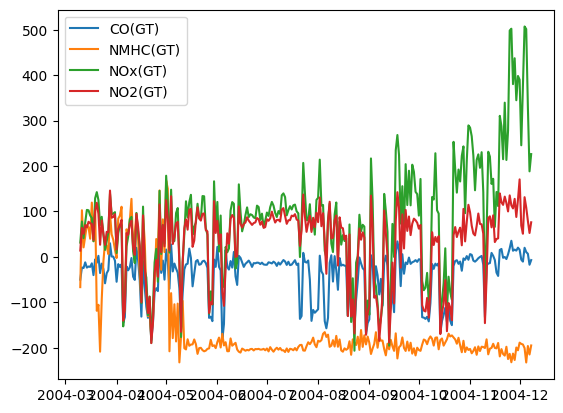

In [73]:
n=10
forecast=var_results.get_prediction()
pm=forecast.predicted_mean
plt.plot(pm, label=df_combined.columns[:-2])
plt.legend()
plt.show()